# Лабораторна 1 — Марковські процеси

## Import

In [1]:
from task_1 import task_1
from task_2 import task_2
from task_3 import task_3
from task_4 import task_4
from task_5 import task_5
from task_6 import task_6

## Завдання 1

![Task1](../Images/1.png)

100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


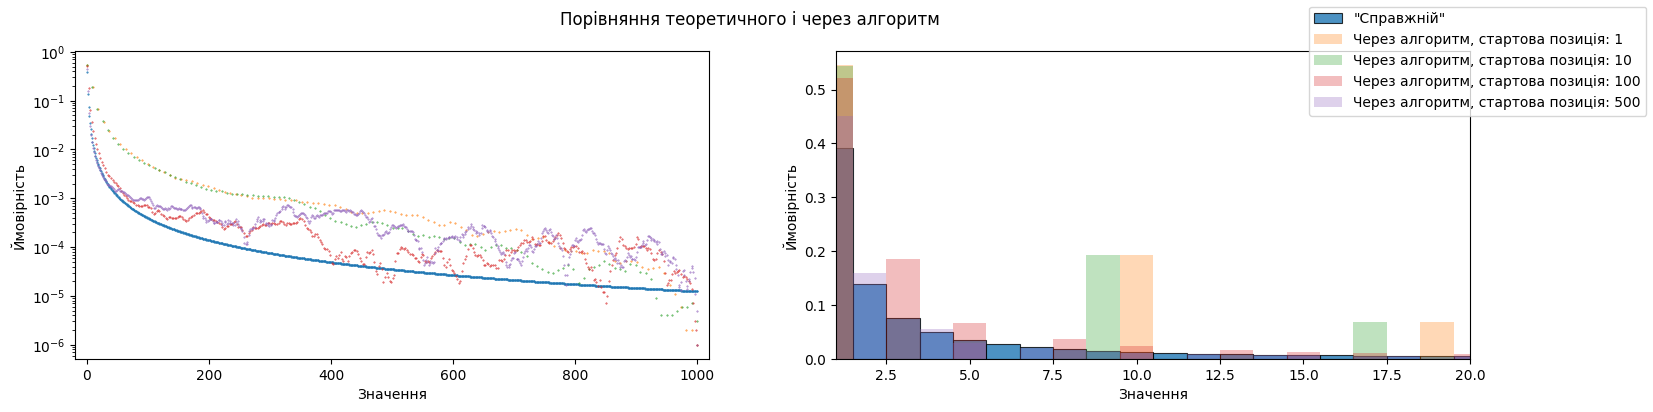

In [2]:
task_1(i_lims = [1, 1000], n = int(1e6), start_pos = [1, 10, 100, 500], figsize = (18, 4))

## Завдання 2

![Task2](../Images/2.png)

In [3]:
result = task_2("../Data/TheWarOfTheWorlds.txt", "../Data/TheTimeMachine.txt", iterations=2500, report_every=500)
result["best_score"]

Start score: -765078.71, unique learn chars: 26



  0%|          | 2/2500 [00:00<02:41, 15.43it/s]


iter 1/2500 | curr -765078.71 | best -765078.71



 20%|██        | 502/2500 [00:33<02:15, 14.70it/s]


iter 500/2500 | curr -445570.90 | best -445570.90



 40%|████      | 1002/2500 [01:06<01:37, 15.35it/s]


iter 1000/2500 | curr -403924.51 | best -403924.51



 60%|██████    | 1502/2500 [01:39<01:04, 15.37it/s]


iter 1500/2500 | curr -403924.51 | best -403924.51



 80%|████████  | 2002/2500 [02:12<00:32, 15.32it/s]


iter 2000/2500 | curr -403924.51 | best -403924.51



100%|██████████| 2500/2500 [02:46<00:00, 15.04it/s]


iter 2500/2500 | curr -403924.51 | best -403924.51


[Example outputs]

[Ciphered sample]
 fi. Dvn aqyji rixmvn, dvn ywipfdzmvo mf, dvn ywipuqybmvo
mf, fxi ndbv adgi, sdqi df umpjf, dvn fxiv opybmvo smvz dvn bdpg. Vy
Gypqyazj xdn dsspydaxin lj. Mvniin, M xdn jiiv vyvi lsyv fxi xmqq fxdf


[Deciphered sample]
 te. And clofe behind, and overtaking it, and overslowing
it, the dawn came, pale at sirft, and then growing pink and warm. No
Morlockf had approached uf. Indeed, I had feen none upon the hill that


[True mapping]
a -> d
b -> r
c -> a
d -> n
e -> i
f -> u
g -> o
h -> x
i -> m
j -> e

[Recovered mapping]
a -> c
b -> w
c -> y
d -> a
e -> j
f -> t
g -> m
h -> x
i -> e
j -> f


np.float64(-403924.512244063)

## Завдання 3

![Task3](../Images/3.png)

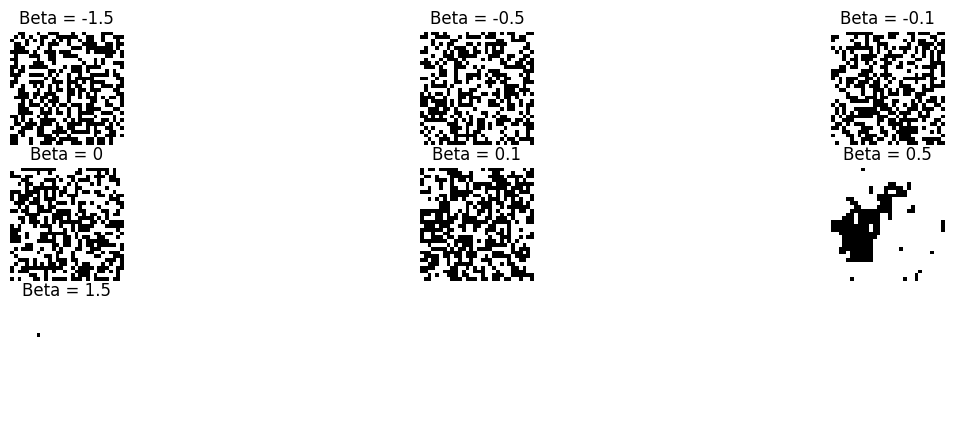

In [4]:
task_3(betas = [-1.5, -0.5, -0.1, 0, 0.1, 0.5, 1.5], figsize=(15, 5))

## Завдання 4

![Task4](../Images/4.png)

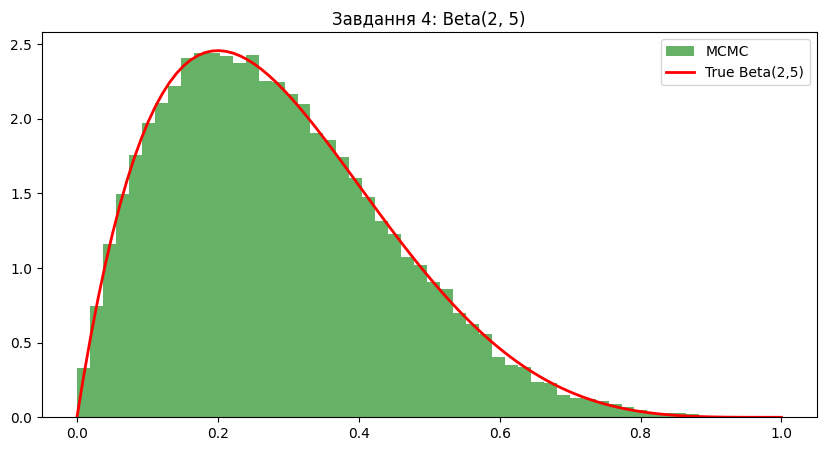

In [5]:
task_4(a=2, b=5, n_samples=50000)

## Завдання 5

![Task5](../Images/5.png)

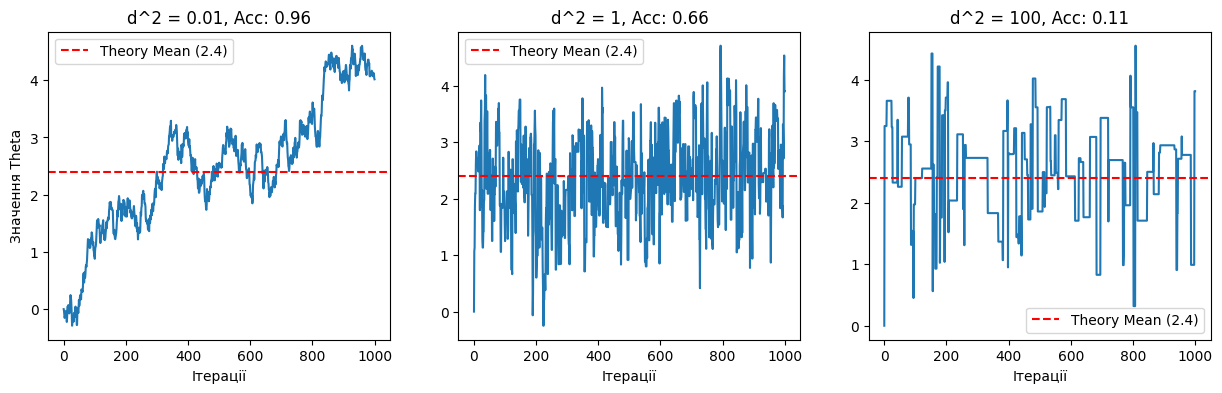

In [6]:
task_5(d_squared_list=[0.01, 1, 100])

## Завдання 6

![Task6](../Images/6.png)

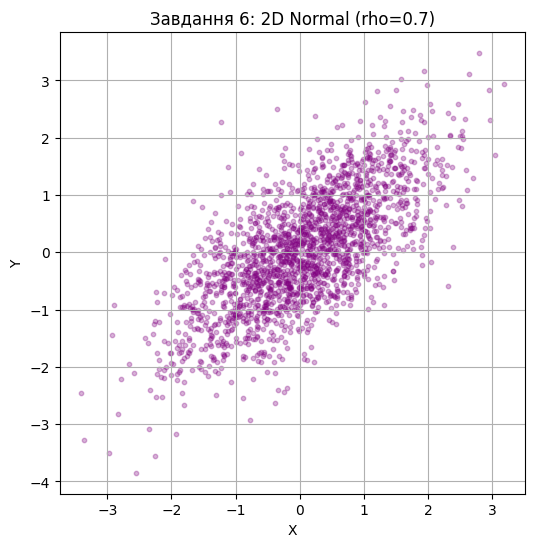

In [7]:
task_6(rho=0.7)